In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.069440,#VALUE!,#VALUE!,0.538337,0.523856,0.552975,0.540099,0.581964,0.567813,0.599813,0.574392,0.555659,0.534345,0.439221,0.405844,0.475692,0.420076,four
1,1997-02-28 00:00:00,0.032326,#VALUE!,#VALUE!,0.645266,0.628310,0.510908,0.501898,0.563598,0.549749,0.559457,0.537504,0.545353,0.531499,0.443249,0.408951,0.467950,0.413271,four
2,1997-03-31 00:00:00,0.045495,#VALUE!,#VALUE!,0.419861,0.435726,0.500652,0.494515,0.538145,0.529193,0.536575,0.515894,0.527484,0.514412,0.446856,0.405322,0.441483,0.382216,four
3,1997-04-30 00:00:00,0.057468,#VALUE!,#VALUE!,0.454503,0.442154,0.556336,0.530701,0.565062,0.551020,0.547063,0.521778,0.550781,0.532880,0.462201,0.419587,0.406354,0.347965,four
4,1997-05-31 00:00:00,0.026339,#VALUE!,#VALUE!,0.624827,0.612519,0.566418,0.540580,0.536349,0.524214,0.552625,0.535758,0.554074,0.535458,0.487060,0.447773,0.412596,0.354794,four


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               235 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.68243041


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.785498,0.545310,0.537710,0.580681,0.589422,0.571211,0.575276,0.558493,0.565632,0.655914,0.658731,0.663136,0.668790
std,0.094420,0.349092,0.331478,0.320676,0.325087,0.337267,0.326287,0.309167,0.297385,0.255710,0.252891,0.134160,0.133796
min,0.684825,0.000000,0.000000,0.000000,0.000000,0.000000,0.034520,0.102883,0.139130,0.033816,0.029799,0.392576,0.390685
25%,0.698593,0.297963,0.310723,0.341962,0.348330,0.298708,0.293692,0.225321,0.241563,0.573892,0.589977,0.586491,0.598218
50%,0.766238,0.578065,0.586489,0.662214,0.654145,0.533044,0.563252,0.636730,0.613949,0.712652,0.712409,0.707922,0.694502
75%,0.856630,0.809987,0.791451,0.854555,0.880966,0.878162,0.888874,0.843979,0.850318,0.850096,0.856611,0.765042,0.764563
max,0.973361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981908,0.977471,0.954957,0.932568,0.841299,0.851915


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 3-mo (Treasury)  23.0  0.545310  0.349092  0.072791   
 2                         combined  46.0  0.665404  0.280500  0.041357   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.394351  0.696269  
 2   0.582106  0.748702  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2402
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.1852
 3                           Two side test p value =    0.0027
 4                          Difference < 0 p value =    0.9987
 5                          Difference > 0 p value =    0.0013
 6                                       Cohen's d =    0.9393
 7                                       Hedge's g =    0.9232
 8                        

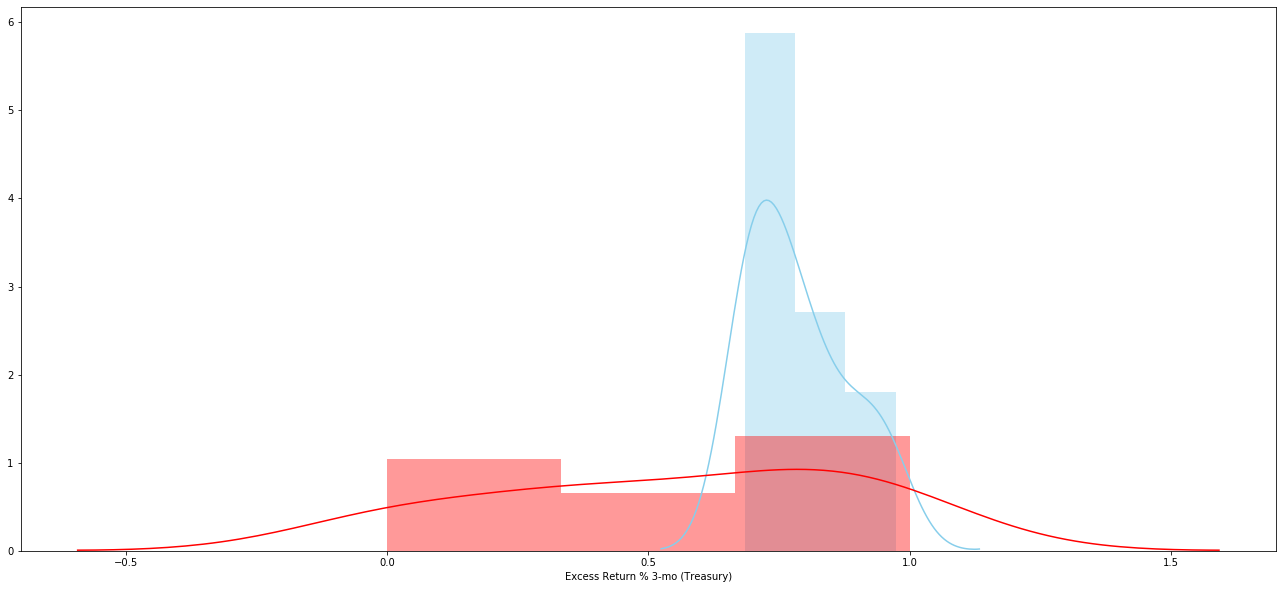

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 3-mo (Agg)  23.0  0.537710  0.331478  0.069118   0.394368   
 2                    combined  46.0  0.661604  0.271601  0.040045   0.580948   
 
    Interval  
 0  0.826328  
 1  0.681051  
 2  0.742259  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2478
 1                             Degrees of freedom =   44.0000
 2                                              t =    3.4479
 3                          Two side test p value =    0.0013
 4                         Difference < 0 p value =    0.9994
 5                         Difference > 0 p value =    0.0006
 6                                      Cohen's d =    1.0167
 7                                      Hedge's g =    0.9993
 8                                  Glass's delta =    

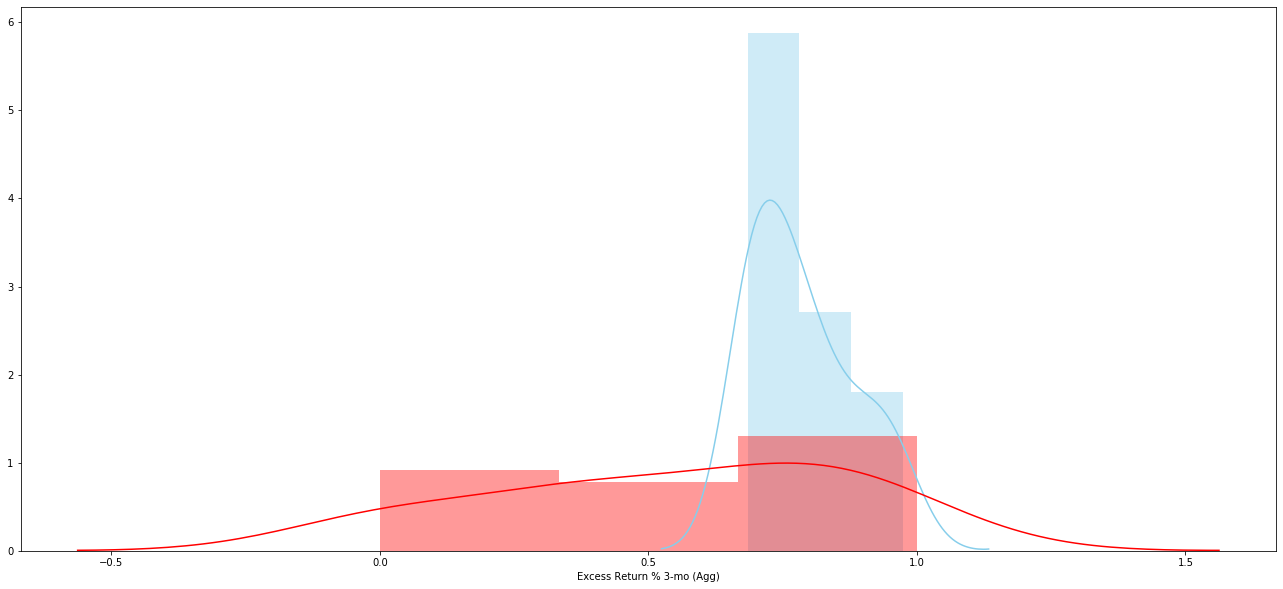

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 6-mo (Treasury)  23.0  0.580681  0.320676  0.066865   
 2                         combined  46.0  0.683089  0.255642  0.037692   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.442011  0.719352  
 2   0.607173  0.759006  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2048
 1                              Degrees of freedom =   44.0000
 2                                               t =    2.9384
 3                           Two side test p value =    0.0052
 4                          Difference < 0 p value =    0.9974
 5                          Difference > 0 p value =    0.0026
 6                                       Cohen's d =    0.8665
 7                                       Hedge's g =    0.8516
 8                        

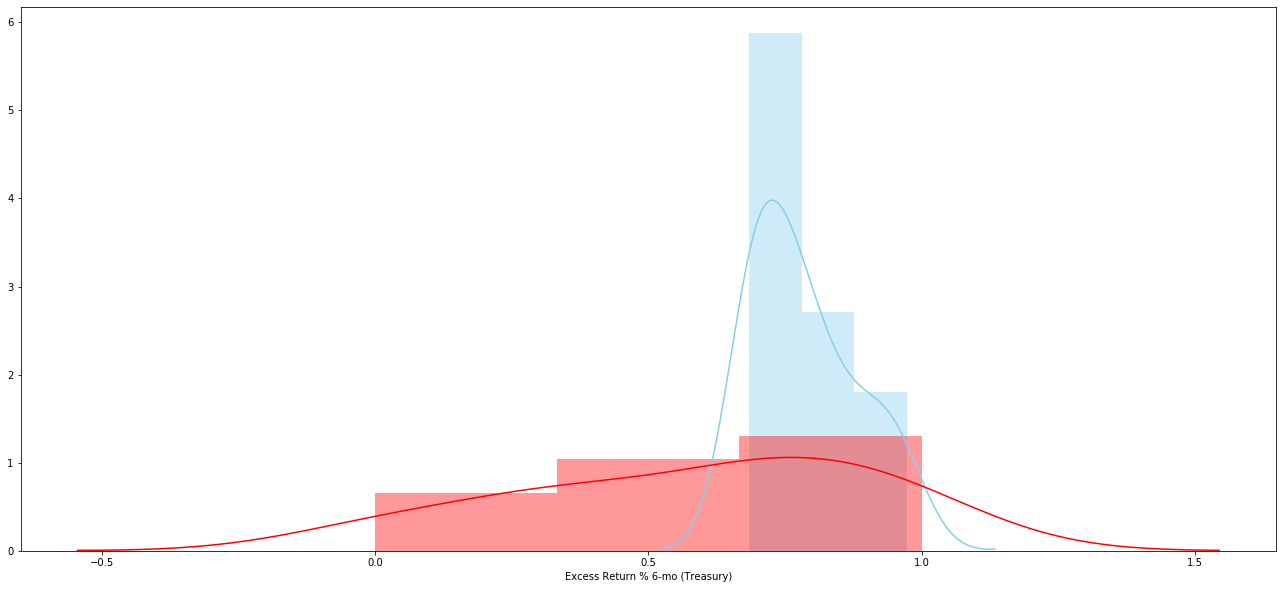

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 6-mo (Agg)  23.0  0.589422  0.325087  0.067785   0.448844   
 2                    combined  46.0  0.687460  0.256613  0.037835   0.611255   
 
    Interval  
 0  0.826328  
 1  0.730000  
 2  0.763664  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1961
 1                             Degrees of freedom =   44.0000
 2                                              t =    2.7778
 3                          Two side test p value =    0.0080
 4                         Difference < 0 p value =    0.9960
 5                         Difference > 0 p value =    0.0040
 6                                      Cohen's d =    0.8191
 7                                      Hedge's g =    0.8051
 8                                  Glass's delta =    

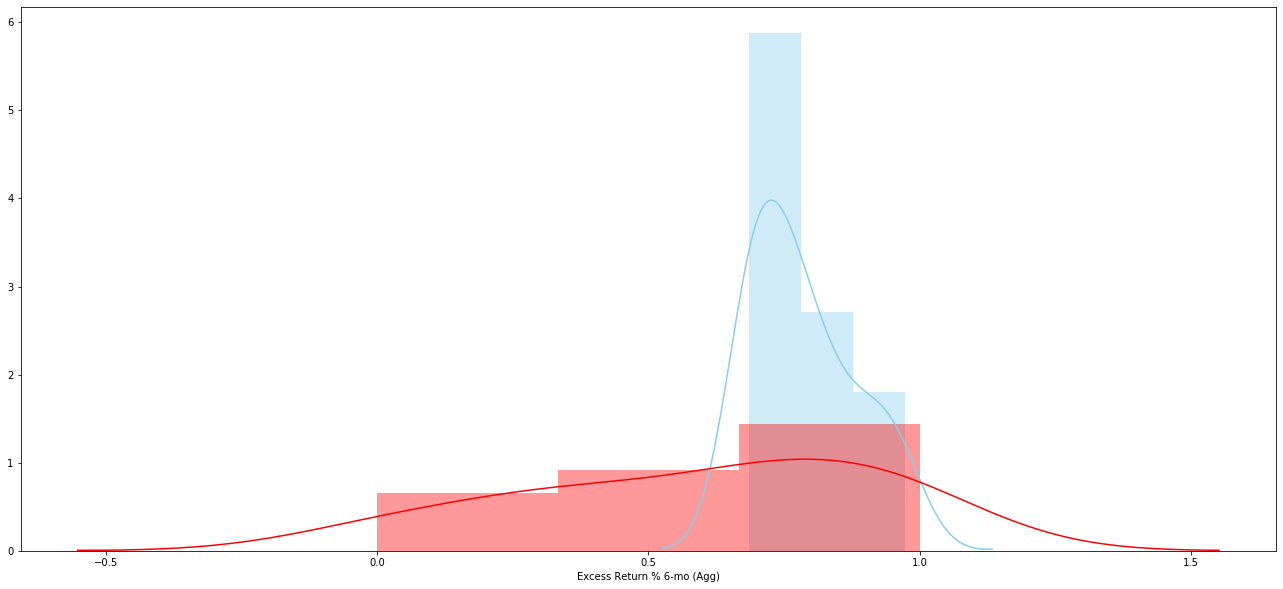

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 9-mo (Treasury)  23.0  0.571211  0.337267  0.070325   
 2                         combined  46.0  0.678354  0.267776  0.039481   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.425366  0.717056  
 2   0.598835  0.757874  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2143
 1                              Degrees of freedom =   44.0000
 2                                               t =    2.9343
 3                           Two side test p value =    0.0053
 4                          Difference < 0 p value =    0.9974
 5                          Difference > 0 p value =    0.0026
 6                                       Cohen's d =    0.8653
 7                                       Hedge's g =    0.8504
 8                        

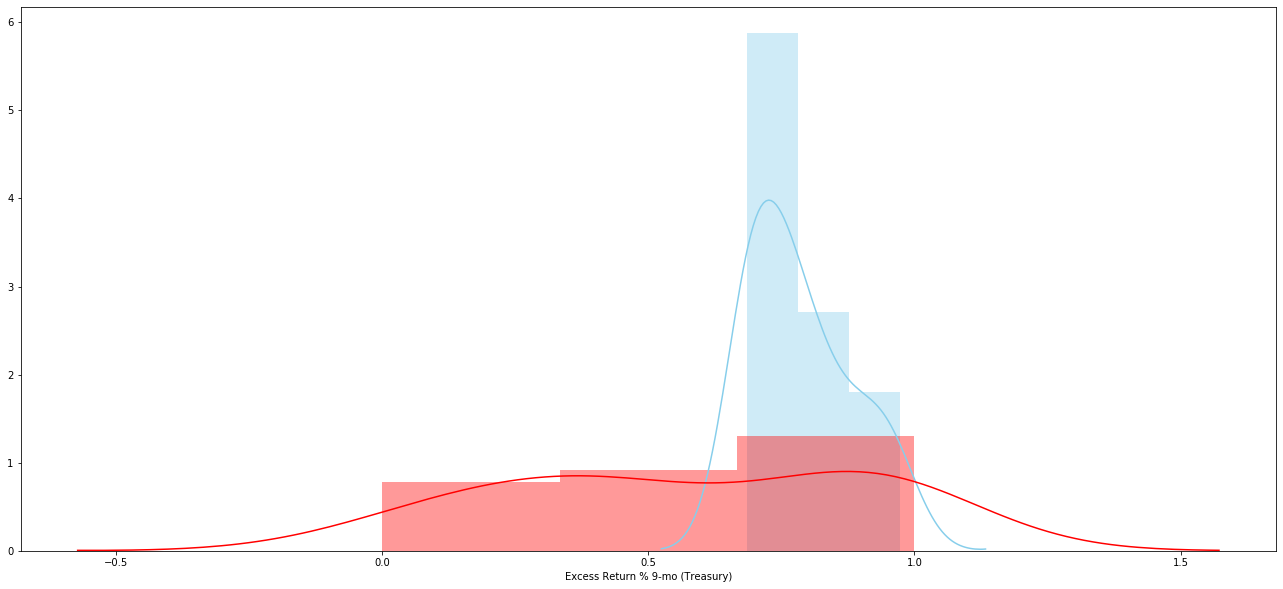

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 9-mo (Agg)  23.0  0.575276  0.326287  0.068036   0.434179   
 2                    combined  46.0  0.680387  0.260194  0.038364   0.603119   
 
    Interval  
 0  0.826328  
 1  0.716374  
 2  0.757655  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2102
 1                             Degrees of freedom =   44.0000
 2                                              t =    2.9681
 3                          Two side test p value =    0.0048
 4                         Difference < 0 p value =    0.9976
 5                         Difference > 0 p value =    0.0024
 6                                      Cohen's d =    0.8752
 7                                      Hedge's g =    0.8602
 8                                  Glass's delta =    

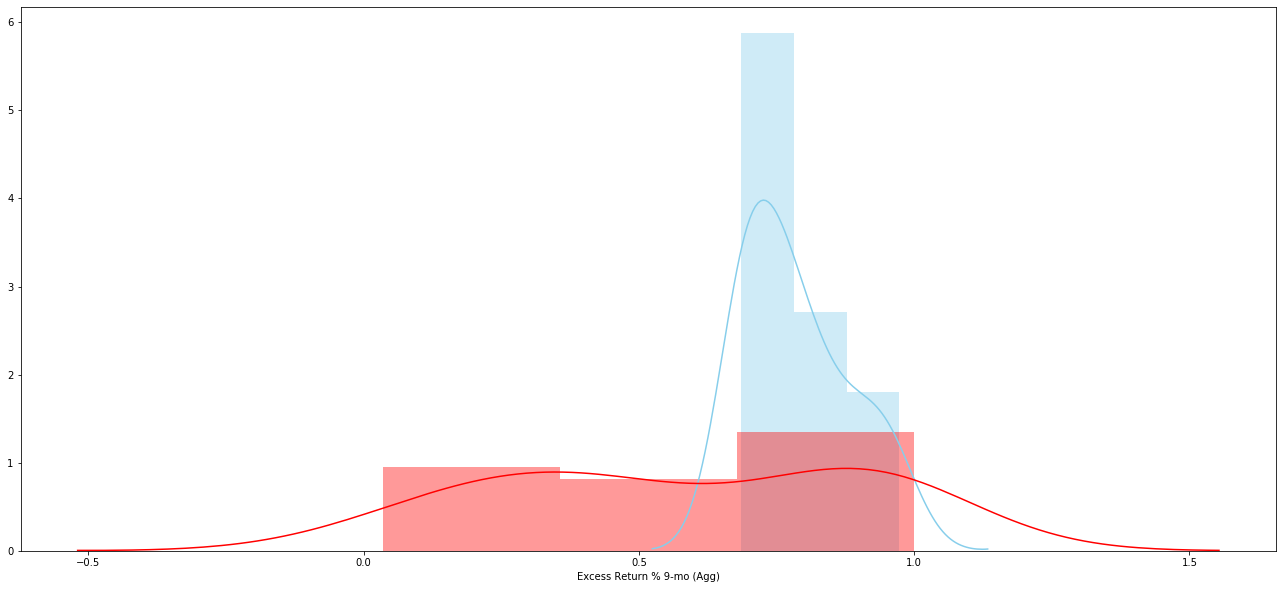

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 12-mo (Treasury)  23.0  0.558493  0.309167  0.064466   
 2                          combined  46.0  0.671995  0.253491  0.037375   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.424799  0.692187  
 2   0.596718  0.747273  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2270
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.3678
 3                           Two side test p value =    0.0016
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    0.9931
 7                                       Hedge's g =    0.9761
 8                    

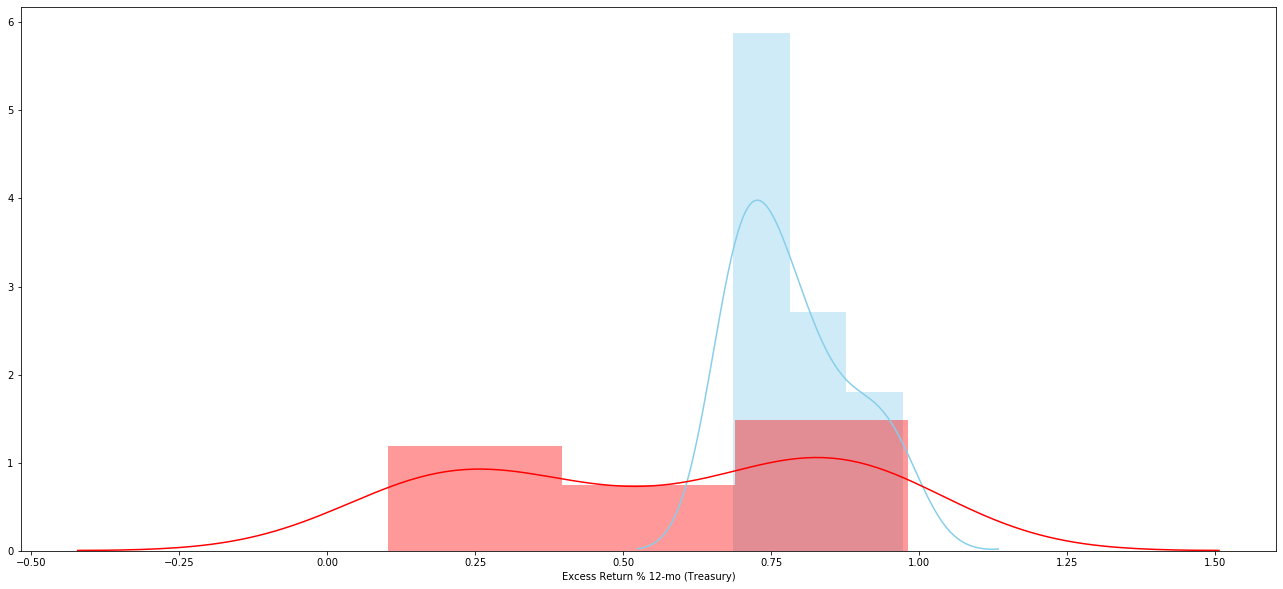

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 12-mo (Agg)  23.0  0.565632  0.297385  0.062009   0.437033   
 2                     combined  46.0  0.675565  0.244844  0.036100   0.602855   
 
    Interval  
 0  0.826328  
 1  0.694231  
 2  0.748275  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2199
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.3795
 3                           Two side test p value =    0.0015
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    0.9965
 7                                       Hedge's g =    0.9795
 8                                   Glass

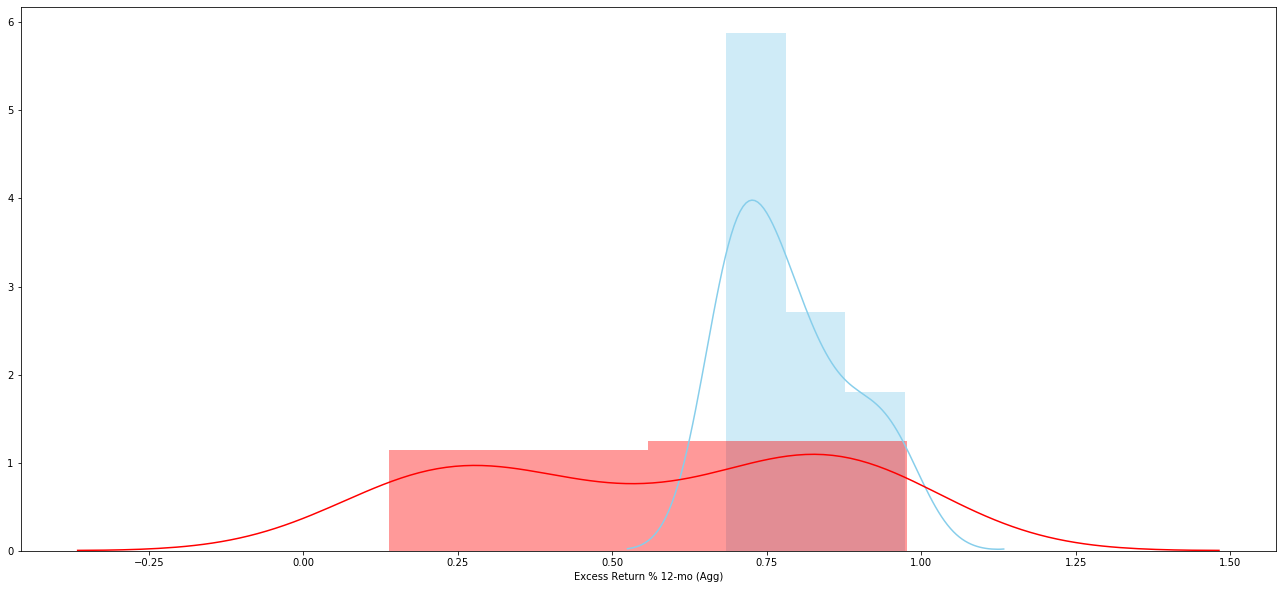

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 24-mo (Treasury)  23.0  0.655914  0.255710  0.053319   
 2                          combined  46.0  0.720706  0.201537  0.029715   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.545336  0.766491  
 2   0.660857  0.780555  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.1296
 1                              Degrees of freedom =   44.0000
 2                                               t =    2.2799
 3                           Two side test p value =    0.0275
 4                          Difference < 0 p value =    0.9862
 5                          Difference > 0 p value =    0.0138
 6                                       Cohen's d =    0.6723
 7                                       Hedge's g =    0.6608
 8                    

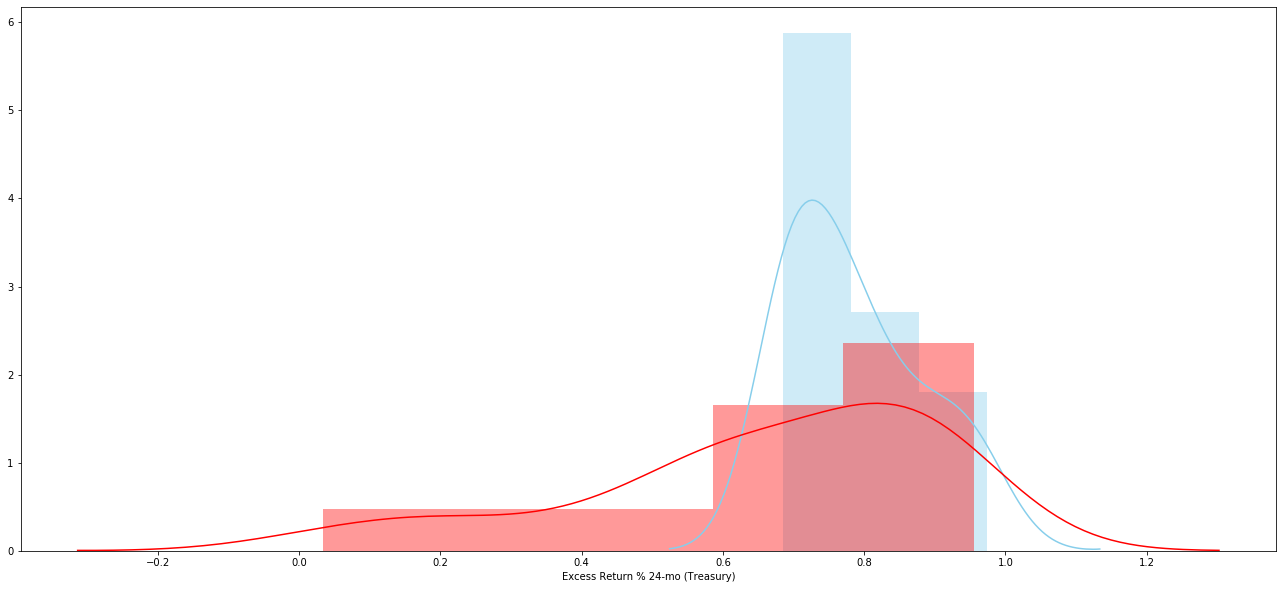

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 24-mo (Agg)  23.0  0.658731  0.252891  0.052731   0.549373   
 2                     combined  46.0  0.722114  0.199328  0.029389   0.662921   
 
    Interval  
 0  0.826328  
 1  0.768090  
 2  0.781307  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1268
 1                              Degrees of freedom =   44.0000
 2                                               t =    2.2521
 3                           Two side test p value =    0.0294
 4                          Difference < 0 p value =    0.9853
 5                          Difference > 0 p value =    0.0147
 6                                       Cohen's d =    0.6641
 7                                       Hedge's g =    0.6527
 8                                   Glass

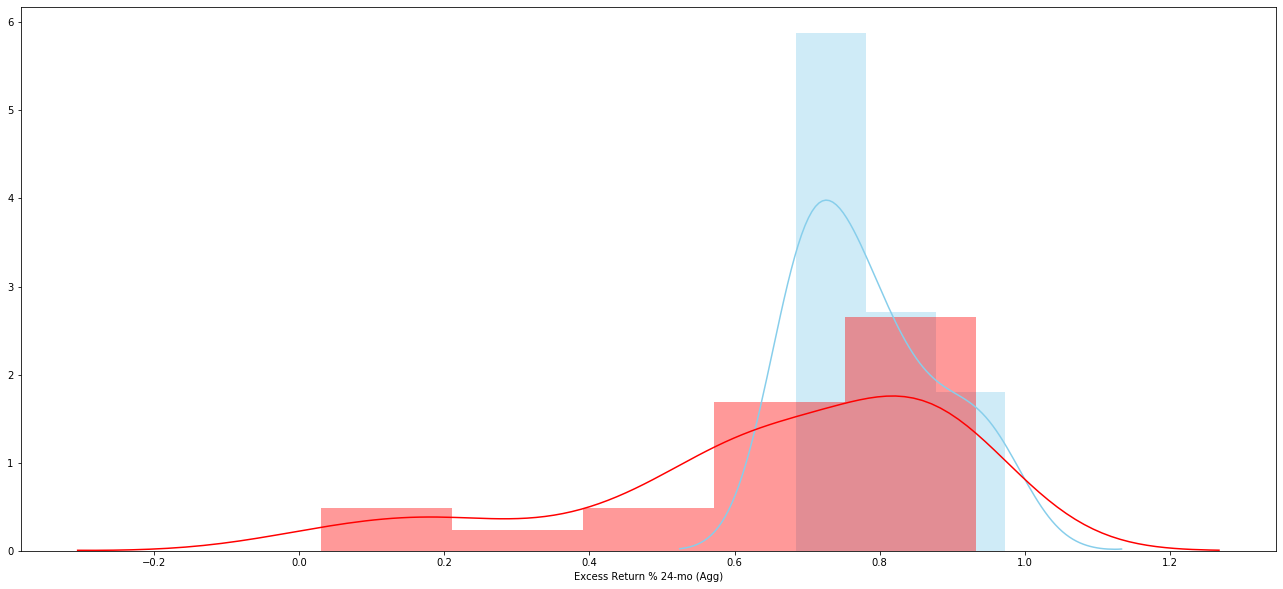

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 36-mo (Treasury)  23.0  0.663136  0.134160  0.027974   
 2                          combined  46.0  0.724317  0.130324  0.019215   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.605121  0.721151  
 2   0.685616  0.763018  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1224
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.5770
 3                           Two side test p value =    0.0009
 4                          Difference < 0 p value =    0.9996
 5                          Difference > 0 p value =    0.0004
 6                                       Cohen's d =    1.0548
 7                                       Hedge's g =    1.0367
 8                    

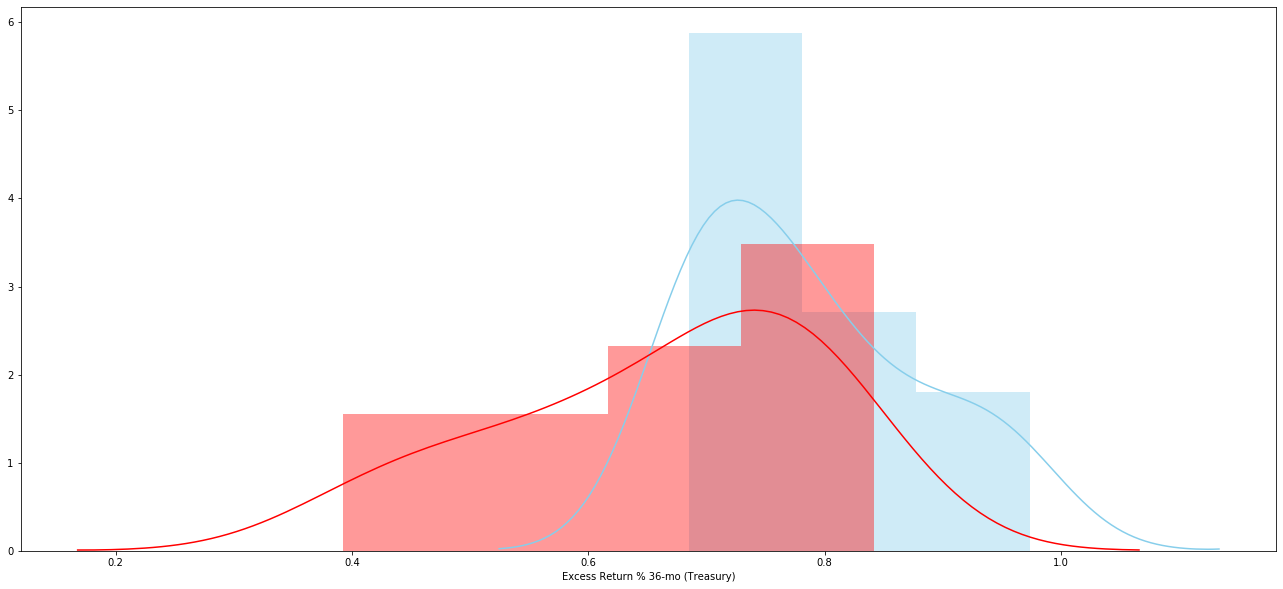

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 36-mo (Agg)  23.0  0.668790  0.133796  0.027898   0.610932   
 2                     combined  46.0  0.727144  0.128806  0.018991   0.688893   
 
    Interval  
 0  0.826328  
 1  0.726648  
 2  0.765395  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1167
 1                              Degrees of freedom =   44.0000
 2                                               t =    3.4179
 3                           Two side test p value =    0.0014
 4                          Difference < 0 p value =    0.9993
 5                          Difference > 0 p value =    0.0007
 6                                       Cohen's d =    1.0079
 7                                       Hedge's g =    0.9906
 8                                   Glass

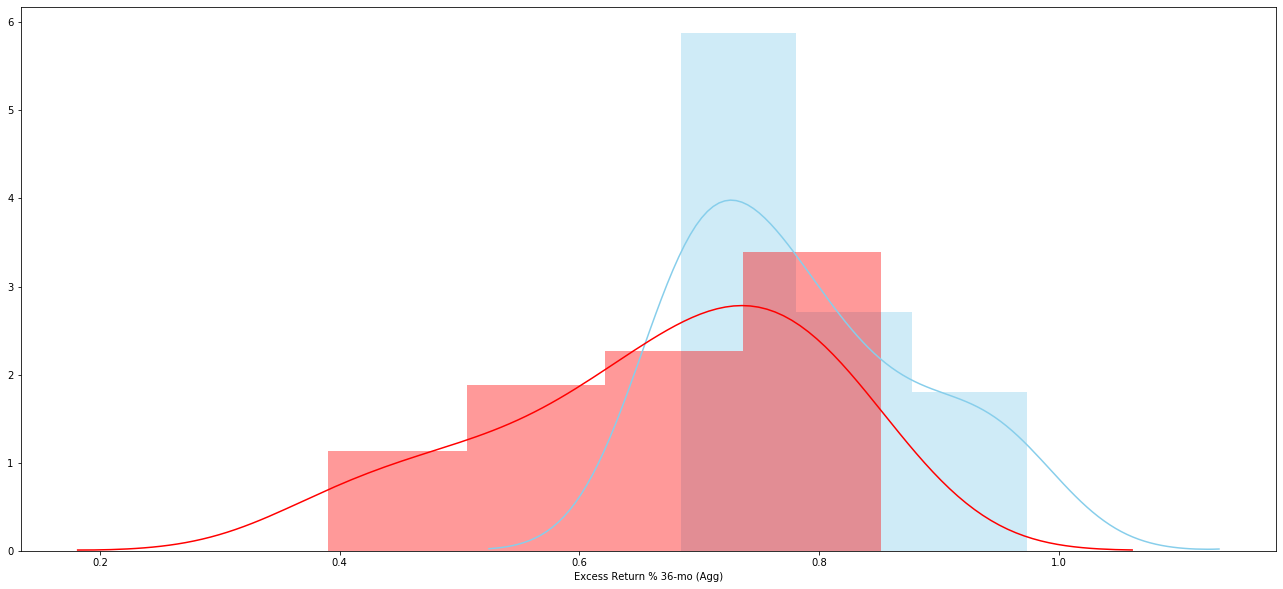

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  301.0  0.512930  0.240602  0.013868   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.462612  0.518146  
 2   0.485639  0.540221  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2951
 1                              Degrees of freedom =   299.0000
 2                                               t =     5.9709
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2955
 7                                       Hedge's g =     1.2922
 8           

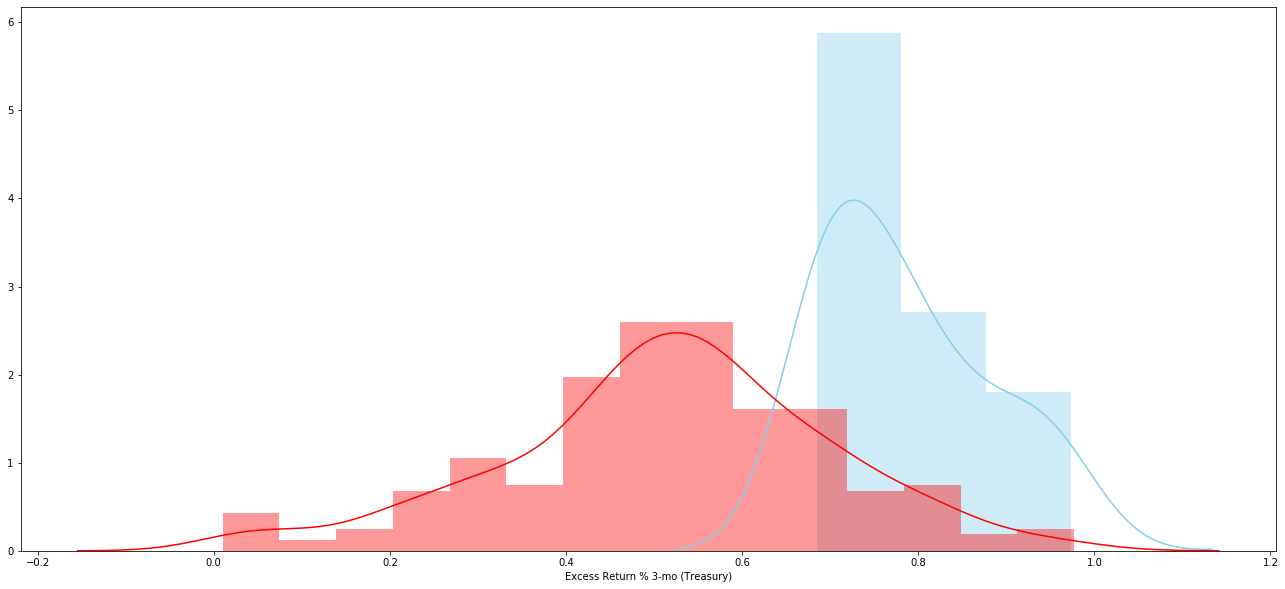

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  301.0  0.512312  0.226784  0.013072   0.486589   
 
    Interval  
 0  0.826328  
 1  0.515654  
 2  0.538036  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2958
 1                             Degrees of freedom =   299.0000
 2                                              t =     6.3991
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3884
 7                                      Hedge's g =     1.3849
 8                                  Glass'

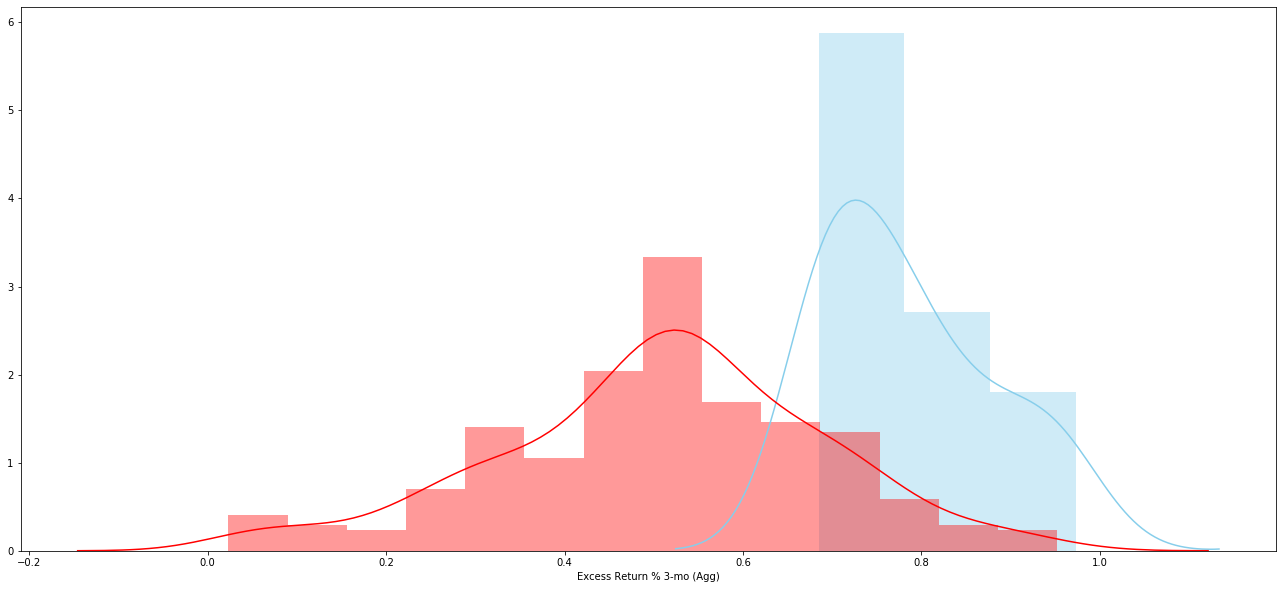

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  298.0  0.517583  0.229344  0.013286   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.468691  0.521659  
 2   0.491437  0.543729  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2903
 1                              Degrees of freedom =   296.0000
 2                                               t =     6.1872
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3430
 7                                       Hedge's g =     1.3396
 8           

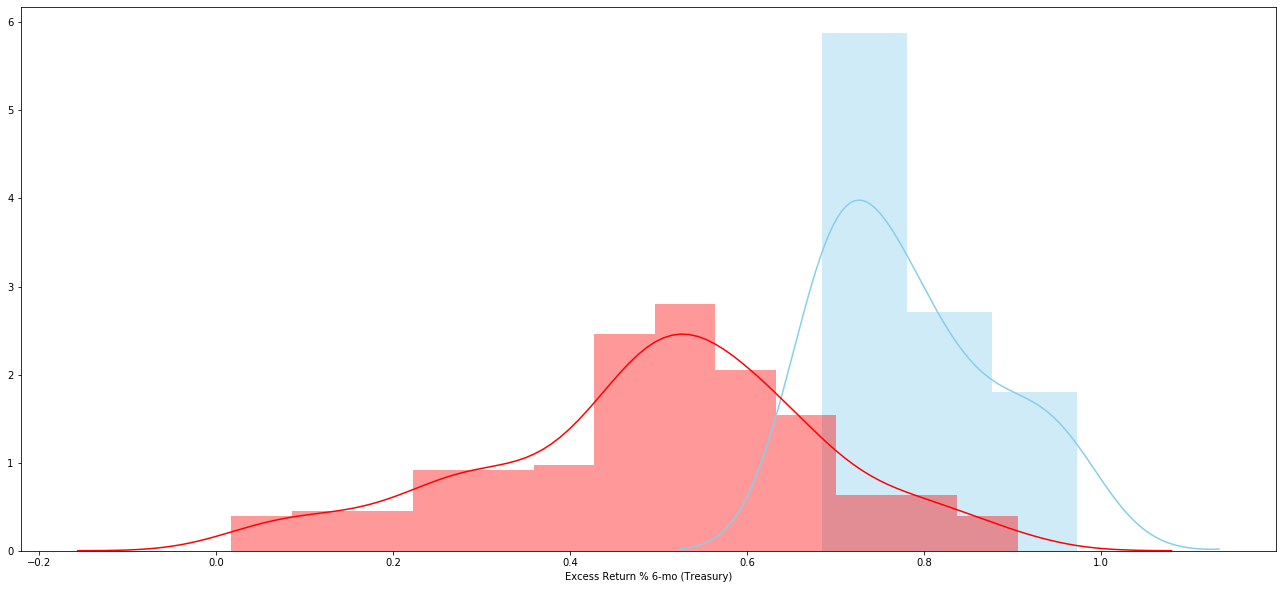

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  298.0  0.521742  0.230709  0.013365   0.495441   
 
    Interval  
 0  0.826328  
 1  0.526400  
 2  0.548043  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2858
 1                             Degrees of freedom =   296.0000
 2                                              t =     6.0386
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3107
 7                                      Hedge's g =     1.3074
 8                                  Glass'

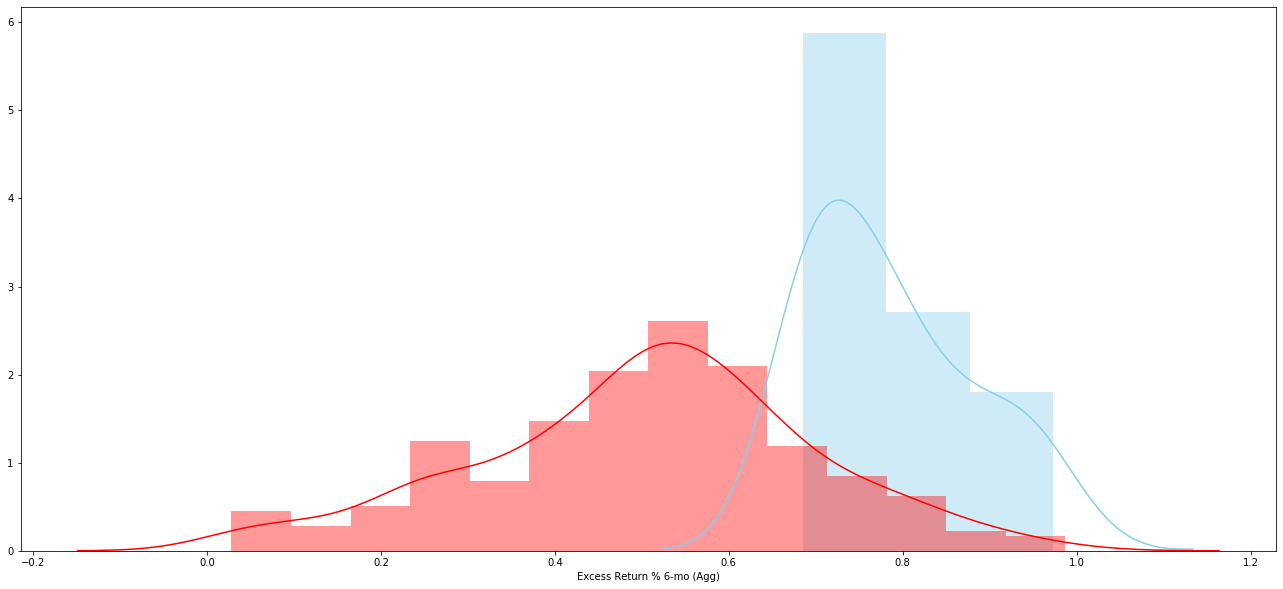

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  295.0  0.529279  0.225279  0.013116   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.481380  0.533846  
 2   0.503465  0.555092  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2779
 1                              Degrees of freedom =   293.0000
 2                                               t =     6.0102
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3051
 7                                       Hedge's g =     1.3018
 8           

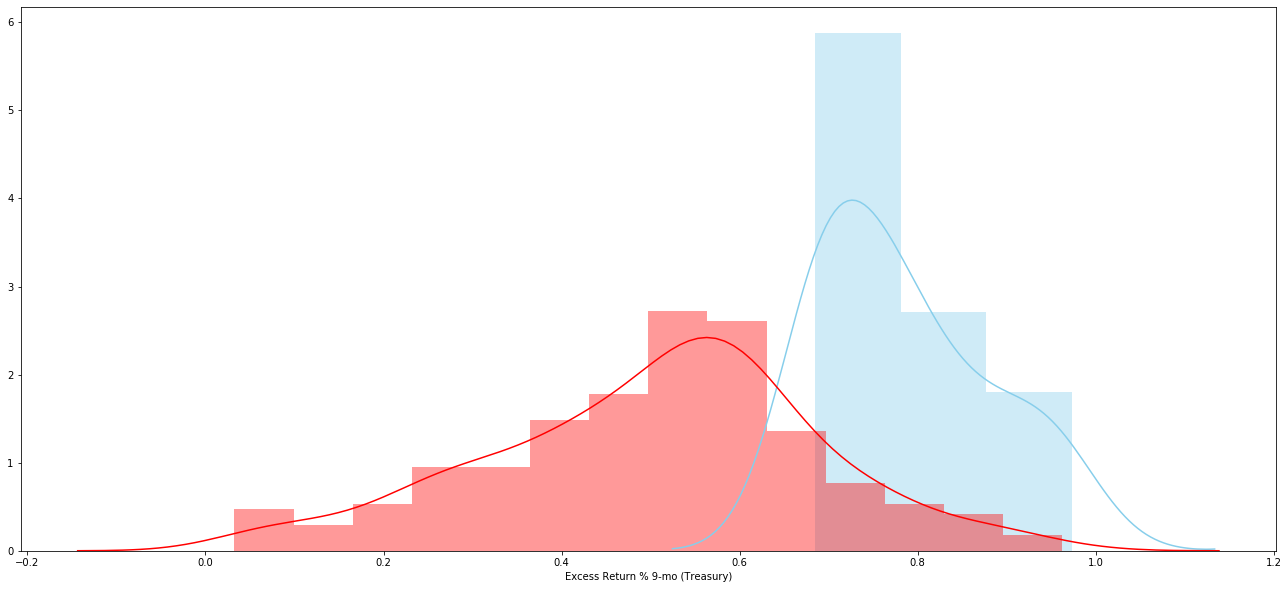

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   23.0  0.785498  0.094420  0.019688   0.744668   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  295.0  0.527633  0.219542  0.012782   0.502476   
 
    Interval  
 0  0.826328  
 1  0.531276  
 2  0.552789  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2797
 1                             Degrees of freedom =   293.0000
 2                                              t =     6.2324
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3534
 7                                      Hedge's g =     1.3499
 8                                  Glass'

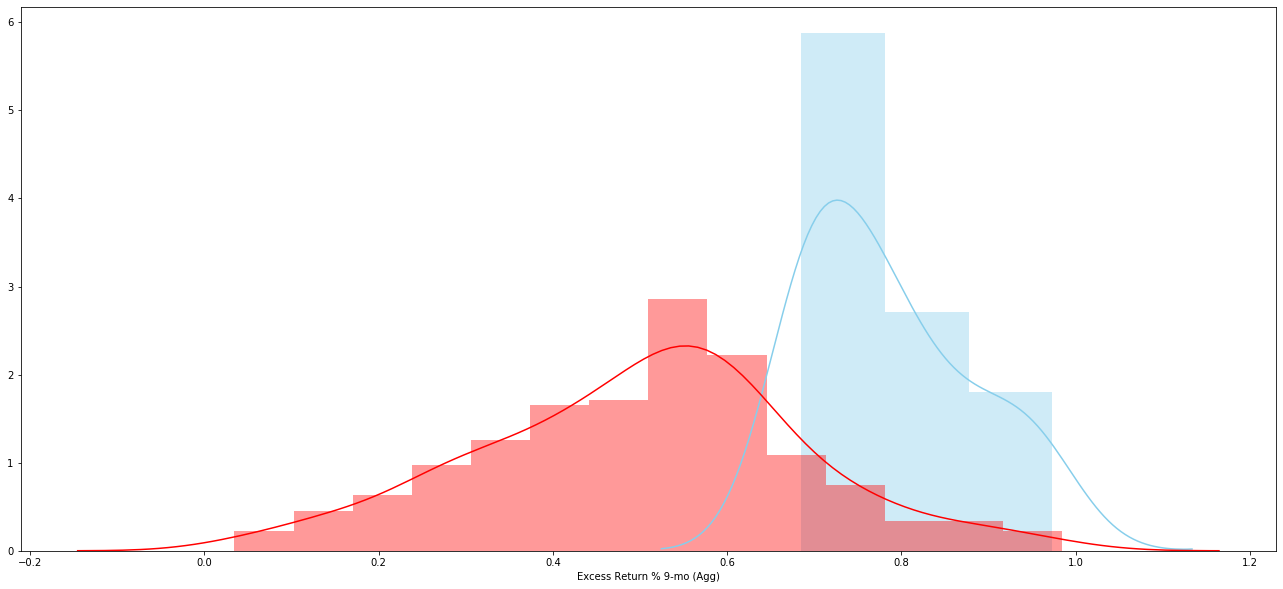

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  292.0  0.519860  0.215525  0.012613   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.472216  0.522078  
 2   0.495036  0.544683  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2884
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.5924
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4322
 7                                       Hedge's g =     1.4285
 8       

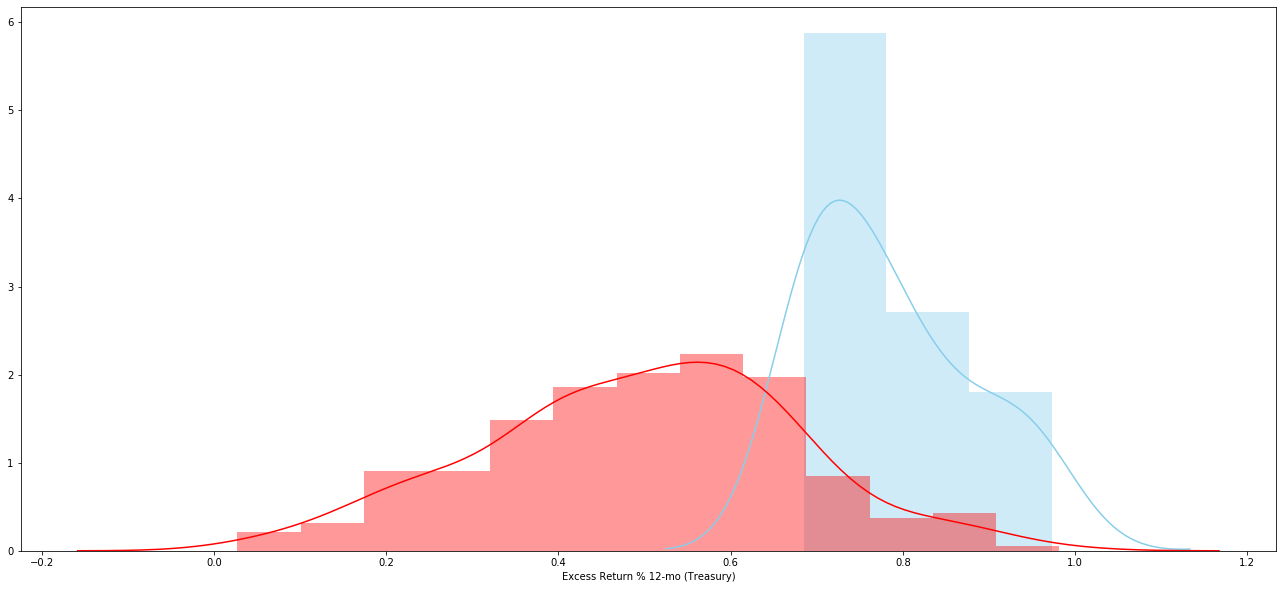

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  292.0  0.522024  0.209715  0.012273   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.475322  0.523672  
 2   0.497870  0.546178  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2860
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.7396
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4642
 7                                       Hedge's g =     1.4604
 8                           

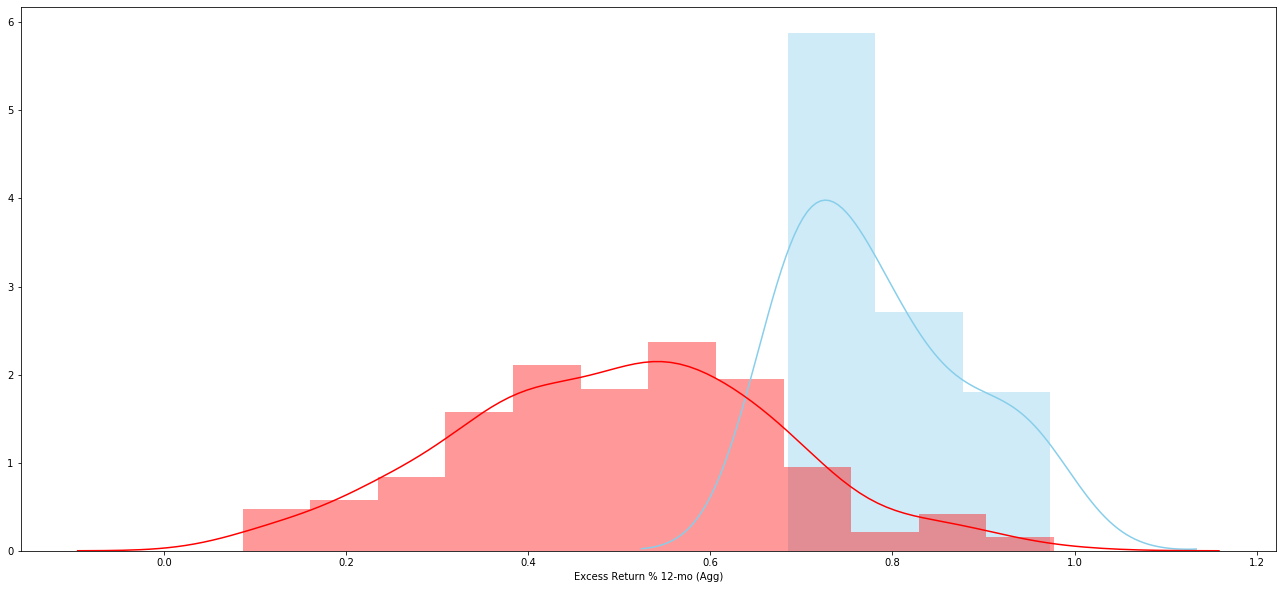

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  280.0  0.530169  0.222042  0.013270   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.480806  0.533832  
 2   0.504048  0.556291  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2782
 1                              Degrees of freedom =   278.0000
 2                                               t =     6.1209
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3322
 7                                       Hedge's g =     1.3286
 8       

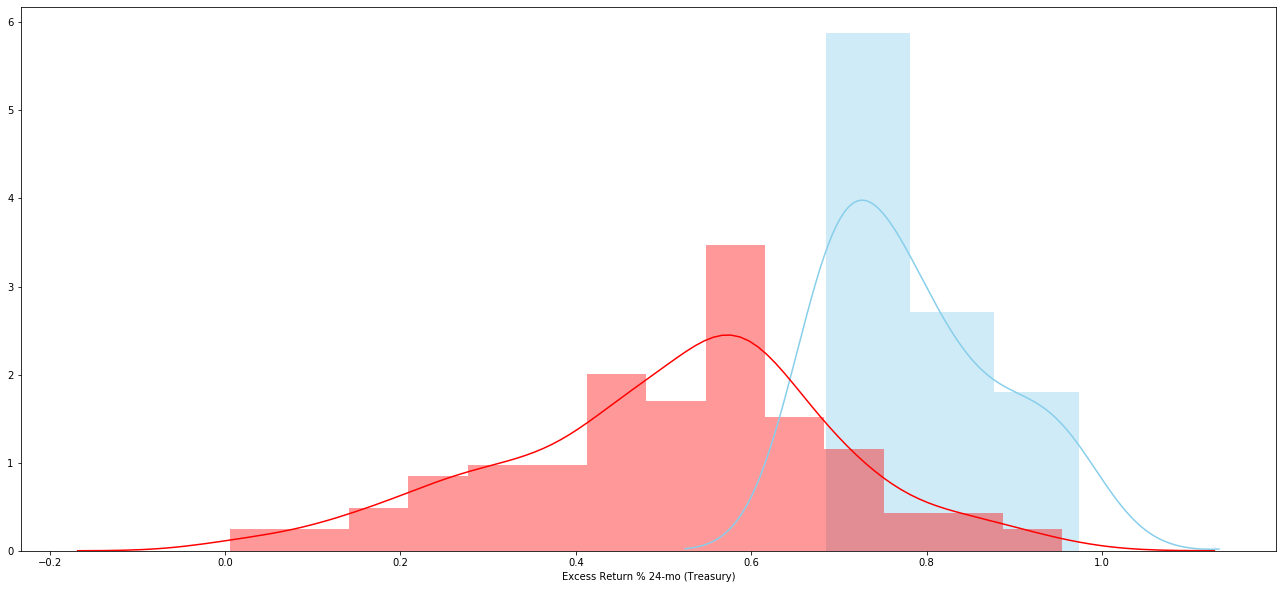

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  280.0  0.521844  0.226410  0.013531   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.471252  0.525244  
 2   0.495209  0.548479  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2872
 1                              Degrees of freedom =   278.0000
 2                                               t =     6.2092
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3514
 7                                       Hedge's g =     1.3478
 8                           

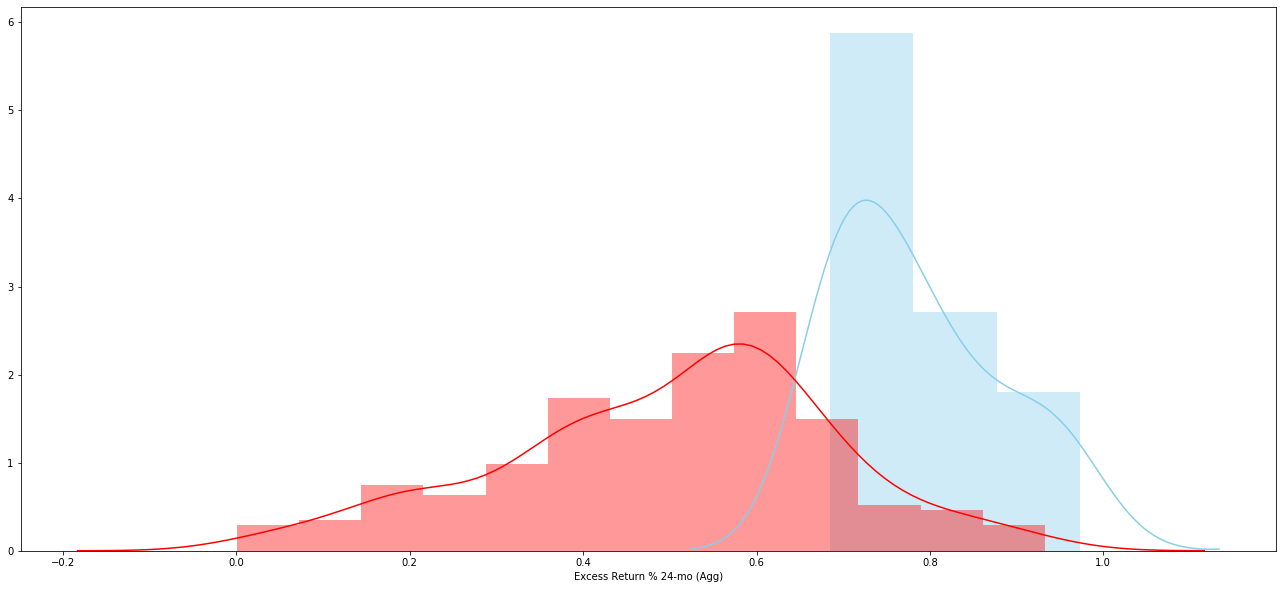

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  268.0  0.518169  0.217213  0.013268   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.466840  0.519306  
 2   0.492045  0.544293  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2924
 1                              Degrees of freedom =   266.0000
 2                                               t =     6.6548
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4513
 7                                       Hedge's g =     1.4472
 8       

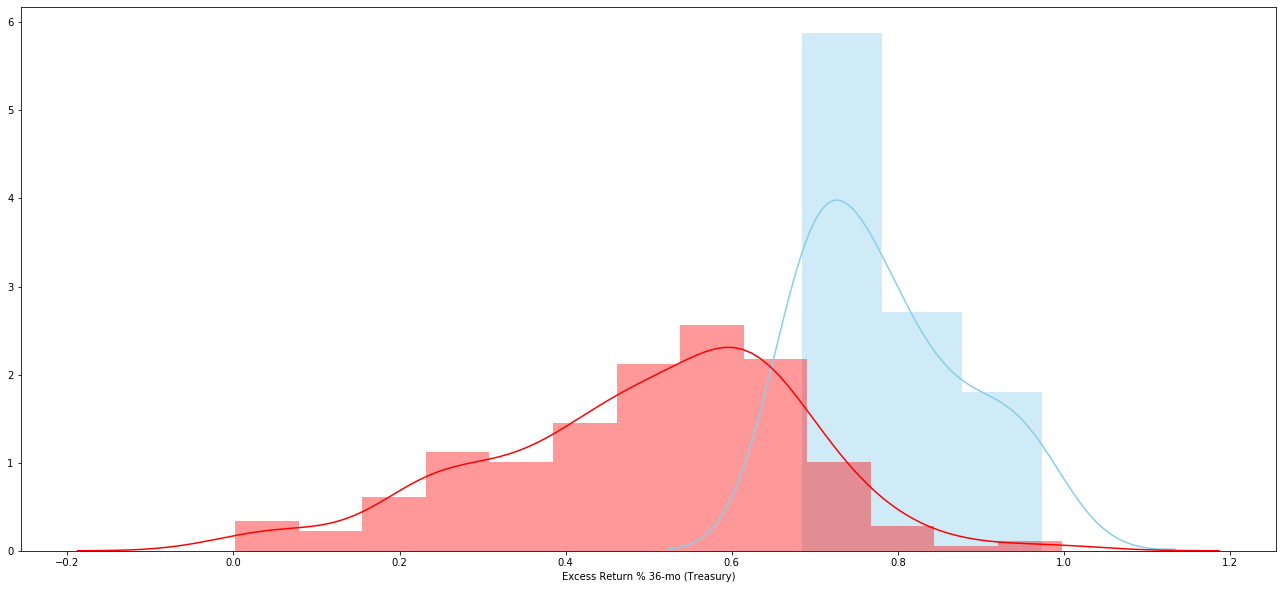

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   23.0  0.785498  0.094420  0.019688   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  268.0  0.510664  0.225685  0.013786   
 
    95% Conf.  Interval  
 0   0.744668  0.826328  
 1   0.457540  0.512186  
 2   0.483521  0.537807  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3006
 1                              Degrees of freedom =   266.0000
 2                                               t =     6.5733
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4335
 7                                       Hedge's g =     1.4295
 8                           

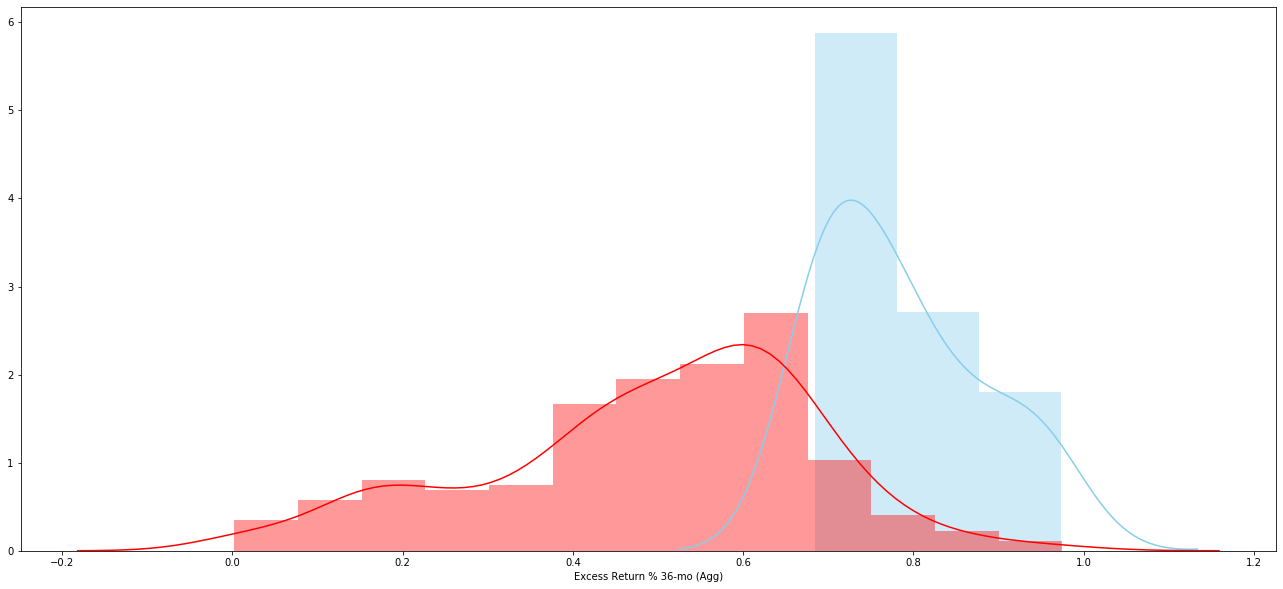

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")